In [1]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
orig_dir = os.getcwd()
data_dir = os.path.abspath('./shakespeare_train')
csv_dir = os.path.abspath('./shakespeare_csv')
print(data_dir)
print(csv_dir)

/home/eric/Codebox/COGS181_Project/shakespeare_train
/home/eric/Codebox/COGS181_Project/shakespeare_csv


In [3]:
files = [file for file in os.listdir(data_dir) if file.endswith('.txt') ]
print(files)

['shakespeare_rnn_512_128_0.txt', 'shakespeare_lstm_256_256_0.2.txt', 'shakespeare_rnn_128_128_0.txt', 'shakespeare_gru_512_128_0.2.txt', 'shakespeare_gru_256_64_0.txt', 'shakespeare_rnn_256_128_0.2.txt', 'shakespeare_gru_512_256_0.2.txt', 'shakespeare_gru_128_64_0.5.txt', 'shakespeare_gru_512_64_0.5.txt', 'shakespeare_rnn_128_256_0.txt', 'shakespeare_rnn_256_64_0.txt', 'shakespeare_lstm_512_256_0.2.txt', 'shakespeare_lstm_256_64_0.2.txt', 'shakespeare_gru_256_256_0.txt', 'shakespeare_rnn_128_64_0.txt', 'shakespeare_rnn_128_256_0.5.txt', 'shakespeare_rnn_128_256_0.2.txt', 'shakespeare_lstm_128_64_0.txt', 'shakespeare_gru_128_256_0.txt', 'shakespeare_lstm_512_128_0.5.txt', 'shakespeare_rnn_128_64_0.5.txt', 'shakespeare_rnn_512_256_0.5.txt', 'shakespeare_rnn_512_256_0.2.txt', 'shakespeare_rnn_128_128_0.2.txt', 'shakespeare_lstm_128_128_0.2.txt', 'shakespeare_gru_256_64_0.5.txt', 'shakespeare_lstm_128_128_0.5.txt', 'shakespeare_gru_128_64_0.2.txt', 'shakespeare_lstm_256_128_0.txt', 'shake

In [4]:
print(files[0:1])

['shakespeare_rnn_512_128_0.txt']


In [5]:
val = {}
for file in tqdm(files):
    csv_file_name = file[:-4] + '.csv'
    csv_file = os.path.join(csv_dir, csv_file_name)
    
    with open(csv_file, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile, delimiter=',')
        csv_writer.writerow(['Loss'])
        
        path = os.path.join(data_dir, file)
        reading = open(path, 'r')
        while True:
            line = reading.readline()
            words = line.split()
            if words and 'Running' not in words:
                loss = words[-1]
                if 'val_loss' not in words:
                    csv_writer.writerow([loss])
                else:
                    val[csv_file_name] = float(loss)
            if not line:
                break
        reading.close()
    csvfile.close()

100%|██████████| 81/81 [00:00<00:00, 189.48it/s]


In [6]:
df = pd.read_csv(os.path.join(csv_dir, files[0].replace('.txt', '.csv')))
df.head()

,Loss
0,4.226854
1,3.772872
2,3.457403
3,3.261784
4,3.094563


In [7]:
csv_results = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]
print(csv_results)

['shakespeare_lstm_128_128_0.2.csv', 'shakespeare_lstm_512_128_0.csv', 'shakespeare_rnn_256_128_0.2.csv', 'shakespeare_rnn_128_128_0.5.csv', 'shakespeare_gru_128_128_0.5.csv', 'shakespeare_lstm_256_128_0.csv', 'shakespeare_rnn_128_64_0.5.csv', 'shakespeare_lstm_512_256_0.2.csv', 'shakespeare_rnn_128_128_0.2.csv', 'shakespeare_gru_128_64_0.5.csv', 'shakespeare_rnn_128_256_0.5.csv', 'shakespeare_lstm_256_128_0.5.csv', 'shakespeare_lstm_128_64_0.csv', 'shakespeare_gru_256_256_0.2.csv', 'shakespeare_rnn_512_64_0.csv', 'shakespeare_gru_512_256_0.csv', 'shakespeare_gru_512_256_0.5.csv', 'shakespeare_lstm_512_64_0.2.csv', 'shakespeare_gru_512_256_0.2.csv', 'shakespeare_gru_256_128_0.2.csv', 'shakespeare_rnn_256_128_0.csv', 'shakespeare_lstm_512_64_0.5.csv', 'shakespeare_gru_128_64_0.csv', 'shakespeare_gru_256_64_0.csv', 'shakespeare_lstm_256_64_0.5.csv', 'shakespeare_gru_128_256_0.5.csv', 'shakespeare_lstm_128_128_0.5.csv', 'shakespeare_rnn_512_128_0.csv', 'shakespeare_gru_256_128_0.5.csv', '

In [8]:
os.chdir(csv_dir)
print(os.getcwd())

/home/eric/Codebox/COGS181_Project/shakespeare_csv


In [9]:
rnn = []
lstm = []
gru = []
for csv_file in csv_results:
    parts = csv_file[:-4].split('_')
    if parts[1] == 'rnn':
        rnn.append(csv_file)
    elif parts[1] == 'lstm':
        lstm.append(csv_file)
    elif parts[1] == 'gru':
        gru.append(csv_file)
print(rnn)
print(lstm)
print(gru)

['shakespeare_rnn_256_128_0.2.csv', 'shakespeare_rnn_128_128_0.5.csv', 'shakespeare_rnn_128_64_0.5.csv', 'shakespeare_rnn_128_128_0.2.csv', 'shakespeare_rnn_128_256_0.5.csv', 'shakespeare_rnn_512_64_0.csv', 'shakespeare_rnn_256_128_0.csv', 'shakespeare_rnn_512_128_0.csv', 'shakespeare_rnn_256_64_0.2.csv', 'shakespeare_rnn_512_64_0.5.csv', 'shakespeare_rnn_512_256_0.csv', 'shakespeare_rnn_128_64_0.csv', 'shakespeare_rnn_128_64_0.2.csv', 'shakespeare_rnn_512_128_0.2.csv', 'shakespeare_rnn_128_128_0.csv', 'shakespeare_rnn_128_256_0.csv', 'shakespeare_rnn_256_128_0.5.csv', 'shakespeare_rnn_512_256_0.2.csv', 'shakespeare_rnn_256_256_0.2.csv', 'shakespeare_rnn_128_256_0.2.csv', 'shakespeare_rnn_512_64_0.2.csv', 'shakespeare_rnn_256_256_0.5.csv', 'shakespeare_rnn_512_128_0.5.csv', 'shakespeare_rnn_512_256_0.5.csv', 'shakespeare_rnn_256_256_0.csv', 'shakespeare_rnn_256_64_0.5.csv', 'shakespeare_rnn_256_64_0.csv']
['shakespeare_lstm_128_128_0.2.csv', 'shakespeare_lstm_512_128_0.csv', 'shakespea

In [10]:
min_t_loss = 999
min_t = ''
min_v_loss = 999
min_v = ''
train = {}
for csv_file in tqdm(rnn):
    df = pd.read_csv(csv_file)
#     plt.title(csv_file)
#     plt.plot(df['Loss'])
#     plt.grid()
#     plt.ylim(0, 5)
#     plt.xlabel('Iterations')
#     plt.ylabel('Loss')
#     plt.show()
    train_loss = df['Loss'].iloc[-1]
    train[csv_file] = float(train_loss)
    val_loss = val[csv_file]
#     print('Final Loss: ' + str(loss))
    if train_loss < min_t_loss:
        min_t_loss = train_loss
        min_t = csv_file
    if val_loss < min_v_loss:
        min_v_loss = val_loss
        min_v = csv_file
print('Best Train Loss: ' + str(min_t_loss) + ' with ' + str(min_t))
print('Val Loss: ' + str(val[min_t]))
print('------------------------------------------------------------')
print('Best Val Loss: ' + str(min_v_loss) + ' with ' + str(min_v))
print('Train Loss: ' + str(train[min_v]))

overfit_rnn = min_t
good_rnn = min_v

100%|██████████| 27/27 [00:00<00:00, 289.68it/s]

Best Train Loss: 1.097148 with shakespeare_rnn_512_64_0.csv
Val Loss: 1.5246731814216
------------------------------------------------------------
Best Val Loss: 1.458284676075 with shakespeare_rnn_512_128_0.2.csv
Train Loss: 1.380923


In [11]:
min_t_loss = 999
min_t = ''
min_v_loss = 999
min_v = ''
train = {}
for csv_file in tqdm(lstm):
    df = pd.read_csv(csv_file)
#     plt.title(csv_file)
#     plt.plot(df['Loss'])
#     plt.grid()
#     plt.ylim(0, 5)
#     plt.xlabel('Iterations')
#     plt.ylabel('Loss')
#     plt.show()
    train_loss = df['Loss'].iloc[-1]
    train[csv_file] = float(train_loss)
    val_loss = val[csv_file]
#     print('Final Loss: ' + str(loss))
    if train_loss < min_t_loss:
        min_t_loss = train_loss
        min_t = csv_file
    if val_loss < min_v_loss:
        min_v_loss = val_loss
        min_v = csv_file
print('Best Train Loss: ' + str(min_t_loss) + ' with ' + str(min_t))
print('Val Loss: ' + str(val[min_t]))
print('------------------------------------------------------------')
print('Best Val Loss: ' + str(min_v_loss) + ' with ' + str(min_v))
print('Train Loss: ' + str(train[min_v]))

overfit_lstm = min_t
good_lstm = min_v

100%|██████████| 27/27 [00:00<00:00, 257.88it/s]

Best Train Loss: 0.566175 with shakespeare_lstm_512_64_0.csv
Val Loss: 1.8788809565937
------------------------------------------------------------
Best Val Loss: 1.3852680027485 with shakespeare_lstm_512_128_0.2.csv
Train Loss: 1.10563


In [12]:
min_t_loss = 999
min_t = ''
min_v_loss = 999
min_v = ''
train = {}
for csv_file in tqdm(gru):
    df = pd.read_csv(csv_file)
#     plt.title(csv_file)
#     plt.plot(df['Loss'])
#     plt.grid()
#     plt.ylim(0, 5)
#     plt.xlabel('Iterations')
#     plt.ylabel('Loss')
#     plt.show()
    train_loss = df['Loss'].iloc[-1]
    train[csv_file] = float(train_loss)
    val_loss = val[csv_file]
#     print('Final Loss: ' + str(loss))
    if train_loss < min_t_loss:
        min_t_loss = train_loss
        min_t = csv_file
    if val_loss < min_v_loss:
        min_v_loss = val_loss
        min_v = csv_file
print('Best Train Loss: ' + str(min_t_loss) + ' with ' + str(min_t))
print('Val Loss: ' + str(val[min_t]))
print('------------------------------------------------------------')
print('Best Val Loss: ' + str(min_v_loss) + ' with ' + str(min_v))
print('Train Loss: ' + str(train[min_v]))

overfit_gru = min_t
good_gru = min_v

100%|██████████| 27/27 [00:00<00:00, 231.12it/s]

Best Train Loss: 0.44805600000000007 with shakespeare_gru_512_64_0.csv
Val Loss: 2.2938063986161
------------------------------------------------------------
Best Val Loss: 1.4172785431147 with shakespeare_gru_512_128_0.5.csv
Train Loss: 1.277773


In [13]:
def color(net):
    words = net[:-4].split('_')
    if 'rnn' in words:
        return 'r'
    elif 'lstm' in words:
        return 'b'
    elif 'gru' in words:
        return 'g'

In [14]:
def label(net):
    words = net[:-4].split('_')
    if 'rnn' in words:
        net_type = 'RNN'
    elif 'lstm' in words:
        net_type = 'LSTM'
    elif 'gru' in words:
        net_type = 'GRU'
    return net_type + ', hidden units per layer = ' + words[2] + ', sequence length = ' + words[3] + ', dropout = ' + words[4]

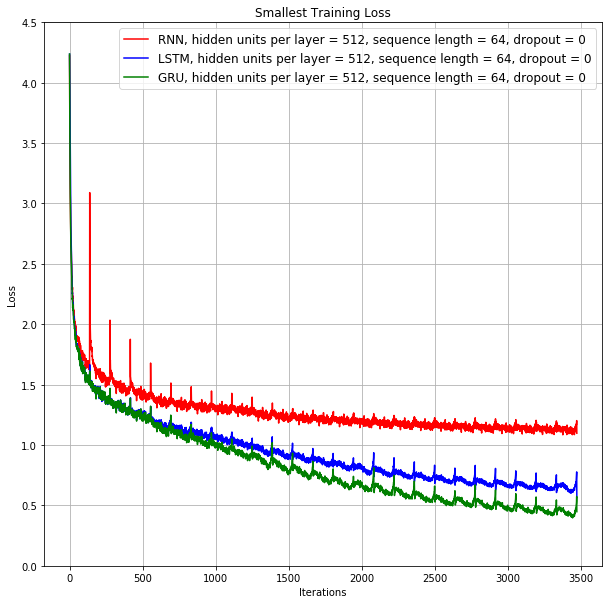

In [15]:
plt.figure(figsize=(10,10))  
plt.title('Smallest Training Loss')
plt.grid()
plt.ylim(0, 4.5)
plt.xlabel('Iterations')
plt.ylabel('Loss')
    
for overfit in [overfit_rnn, overfit_lstm, overfit_gru]:
    df = pd.read_csv(overfit)
    plt.plot(df['Loss'], color(overfit), label=label(overfit))
    
plt.legend(loc=1,prop={'size': 12})
plt.savefig('smallest_training_loss.png')

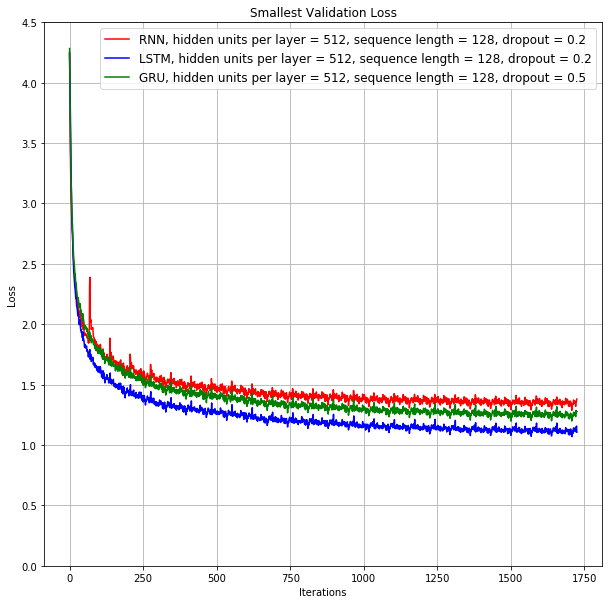

In [16]:
plt.figure(figsize=(10,10))  
plt.title('Smallest Validation Loss')
plt.grid()
plt.ylim(0, 4.5)
plt.xlabel('Iterations')
plt.ylabel('Loss')
handles = []
    
for good in [good_rnn, good_lstm, good_gru]:
    df = pd.read_csv(good)
    plt.plot(df['Loss'], color(good), label=label(good))
    
plt.legend(loc=1,prop={'size': 12})
plt.savefig('smallest_validation_loss.png')